# PMSM E Machine

Traits:
- three phase
- symmetric
- Y configuration
- no non-linearities
- no cross inductance
- no losses in ferrit


### Useful Links
https://de.mathworks.com/help/mcb/gs/field-weakening-control-mtpa-pmsm.html



In [29]:
# Specs:
p = 5
L_d = 0.000127
L_q = 0.000277
Psi_pm = 0.061
R_s = 0.011


In [30]:
import numpy as np
from matplotlib import pyplot as plt





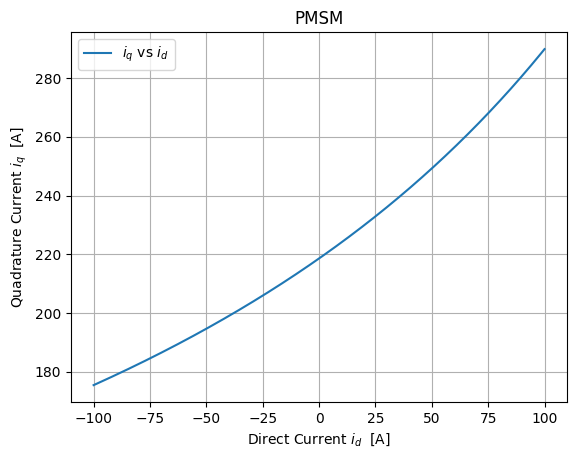

In [31]:
M = 100 
i_d = np.linspace(-100, 100, 1000)
i_q = 2 * M / (3 * p * (Psi_pm + (L_d - L_q) * i_d))
fig, ax = plt.subplots()
plt.plot(i_d, i_q)
ax.set_xlabel('Direct Current $i_d$  [A]')
ax.set_ylabel('Quadrature Current $i_q$  [A]')
plt.title('PMSM')
plt.legend(['$i_q$ vs $i_d$'])
plt.grid()

Min I_max: 199.17046195860732 at i_d: -71.97197197197197


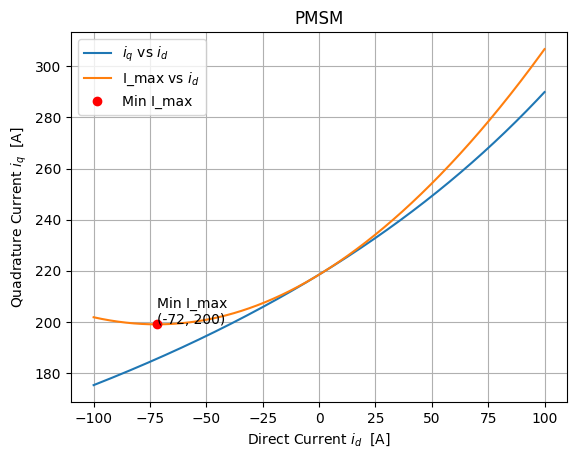

In [32]:
I_max = np.sqrt(  (i_d**2 + i_q**2) )
min_loss = np.min(I_max)
min_loss_idx = np.argmin(I_max)
# Plotting I_max vs i_d
ax.plot(i_d, I_max)
# Marking the minimum loss point
ax.plot([i_d[min_loss_idx]],[min_loss], "ro")
print(f"Min I_max: {min_loss} at i_d: {i_d[min_loss_idx]}")
ax.annotate(f'Min I_max\n(-72, 200)', xy=(i_d[min_loss_idx], min_loss))

ax.legend(['$i_q$ vs $i_d$', 'I_max vs $i_d$', 'Min I_max'])
fig

omega = 5235.987755982988


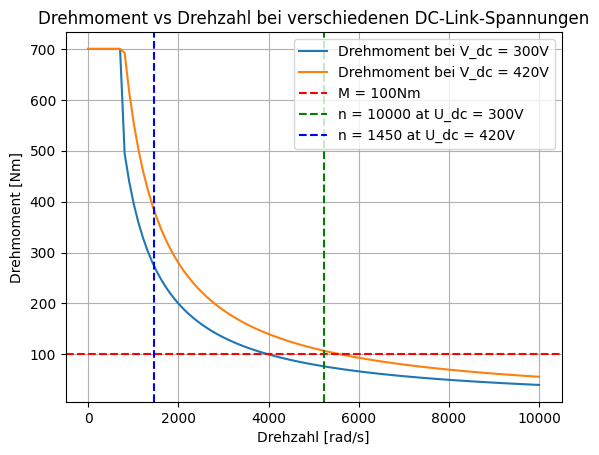

In [55]:
T = 700  # WErt für das Drehmoment
n_1 = 10000  # Wert für die Drehzahl
o = p*2*np.pi*n_1/60
print(f"omega = {o}")
omega_nominal = 750  # Beispielwert für die Nenndrehzahl in rad/s
V_dc1 = 300  # Beispielwert für die DC-Link-Spannung
V_dc2 = 420  # Erhöhte DC-Link-Spannung

# Bereich der Drehzahl
omega = np.linspace(1, 10000, 100)

# Berechnung des Drehmoments für die erste DC-Link-Spannung
T1 = np.where(omega <= omega_nominal, T, V_dc1 / (omega * 0.00075))

# Berechnung des Drehmoments für die erhöhte DC-Link-Spannung
T2 = np.where(omega <= omega_nominal, T, V_dc2 / (omega * 0.00075))

# Plotten des Drehmoments gegen die Drehzahl
plt.plot(omega, T1, label='Drehmoment bei V_dc = 300V')
plt.plot(omega, T2, label='Drehmoment bei V_dc = 420V')
plt.axhline(y=100, color='r', linestyle='--', label=f'M = 100Nm')
plt.axvline(x=o, color='g', linestyle='--', label=f'n = {n_1} at U_dc = {V_dc1}V')
plt.axvline(x=1450, color='b', linestyle='--', label='n = 1450 at U_dc = 420V')
# Diagramm beschriften
plt.xlabel('Drehzahl [rad/s]')
plt.ylabel('Drehmoment [Nm]')
plt.title('Drehmoment vs Drehzahl bei verschiedenen DC-Link-Spannungen')
plt.legend()
plt.grid(True)
plt.show()